In [1]:
import pandas as pd

df01 = pd.read_csv(r'data/origint/ex/0000083.csv',sep=';', names=['Num','X','Y','Dist'],dtype={'Num':'str'})
df01

FileNotFoundError: File b'data/origint/ex/0000083.csv' does not exist

In [14]:
df02 = pd.read_csv(r'data/origint/ex/0000084.csv',sep=';', names=['Num','X','Y','Dist'],dtype={'Num':'str'})
df02

,Num,X,Y,Dist
0,491,14.248720,-2.715504,NaN
1,489,39.222694,3.413790,NaN
2,487,115.287795,-0.196037,NaN
3,488,64.317754,-1.468485,NaN
4,486,141.732032,5.939320,NaN
5,490s,87.991032,4.576447,NaN
6,492,-10.788652,2.283218,NaN
7,493,-35.669178,-3.980927,NaN
8,494,-60.840355,1.019655,NaN
9,495,-85.605449,-5.170181,NaN


Дополнительный шаг - выборка номер одинаковых номеров пунктов.
Сортирую номера и записи в таблицы, надеюсь, что принцип сортировки и в сете и в дф одинаковые, но лучше будет убедиться.

In [15]:
inter = sorted(set(list(zip(*df01['Num'].iteritems()))[1]).intersection(set(list(zip(*df02['Num'].iteritems()))[1])))
df01_com = df01.loc[df01['Num'].isin(inter)].sort_values(by='Num')
df02_com = df02.loc[df02['Num'].isin(inter)].sort_values(by='Num')
inter

['485', '486', '487', '488', '489', '491']

Создаю по два набора точек - mp01,mp02 - все точки, включая стоянки. mp01_c, mp02_c - набор общих точек.

In [16]:
from shapely.geometry import MultiPoint

mp01 = MultiPoint([i[2:4] for i in df01.itertuples()])
mp01_c = MultiPoint([i[2:4] for i in df01_com.itertuples()])
mp02 = MultiPoint([i[2:4] for i in df02.itertuples()])
mp02_c = MultiPoint([i[2:4] for i in df02_com.itertuples()])

In [17]:
mp01_c[0].distance(mp01_c[1]) - mp02_c[0].distance(mp02_c[1])

-1.4916869771607004

In [18]:
mp01_c[0].distance(mp01_c[1]),mp02_c[0].distance(mp02_c[1])


(25.654838358676074, 27.146525335836774)

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline  

def plp(z,n):
    for p in z:        
        x = [i.x for i in p.geoms]
        y = [i.y for i in p.geoms]
        plt.figure(n)
        plt.plot(x,y,'ro')
        plt.plot(x,y,'ro')
    plt.show()

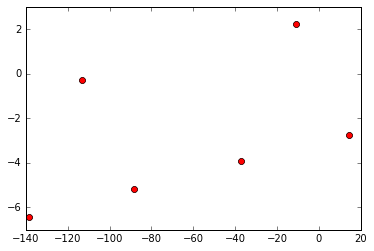

In [20]:
plp((mp01_c,),1)

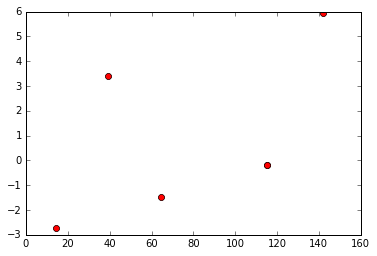

In [21]:
plp((mp02_c,),1)

In [39]:
inter

['485', '486', '487', '488', '489', '491']

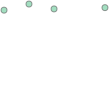

In [51]:
mp02_c[2:]

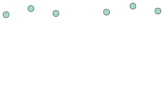

In [25]:
mp01_c

In [26]:
from shapely import affinity
from scipy.optimize import minimize,rosen_der

def mov(x,y,angle,geom):
    geom_r = affinity.rotate(geom,angle,origin=(0,0))
    geom_t = affinity.translate(geom_r,x,y)
    return geom_t

def calc_dist(geom1,geom2):
    dist = 0
    geom_list = zip(geom1,geom2)
    for item in geom_list:
        dist+=item[0].distance(item[1])
    return dist

def fun1(x0,geom1, geom2):
    x,y,angle = x0
    n_geom = mov(x,y,angle,geom2)
    return calc_dist(geom1,n_geom)

In [27]:

x_guess = mp01_c[0].x -mp02_c[0].x
y_guess = mp01_c[0].y -mp02_c[0].y

x0 = (x_guess,y_guess,0)

In [28]:
re = minimize(fun1,x0,args=(mp01_c,mp02_c),method='BFGS')
re

      fun: 51.62205671652598
 hess_inv: array([[  3.03057286e-07,   8.81912673e-07,  -3.87389559e-06],
       [  8.81912673e-07,   3.52687622e-06,  -1.48303059e-05],
       [ -3.87389559e-06,  -1.48303059e-05,   6.38212406e-05]])
      jac: array([ 0.54986668,  0.18983173,  0.03851318])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 531
      nit: 34
     njev: 104
   status: 2
  success: False
        x: array([ -1.52603522e+02,  -3.70924986e+00,  -7.02929776e-04])

In [29]:
res = minimize(fun1,x0,args=(mp01_c,mp02_c), method = 'SLSQP')
res

     fun: 51.62205884015616
     jac: array([ 0.19972467, -0.2691493 , -0.15842342,  0.        ])
 message: 'Optimization terminated successfully.'
    nfev: 171
     nit: 28
    njev: 28
  status: 0
 success: True
       x: array([ -1.52603518e+02,  -3.70925639e+00,  -7.03255286e-04])

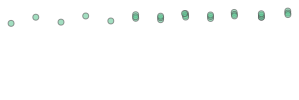

In [30]:
mp_moved = mov(*res.x,mp02)
mp_moved

In [31]:
mpcm = mov(*res.x,mp02_c)

In [32]:
for i in list(range(len(mp02_c.geoms)))[0:-1]:
    print(mp01_c[i].distance(mpcm[i]))

51.62105225775157
0.00019819073298090137
0.00025890111464681013
0.00021562756914660937
0.000326464910881237


In [33]:
plp((mp01_c,ng),7)

NameError: name 'ng' is not defined

In [34]:
mp01_c[0].x,mp01_c[0].y

(14.29278234500196, -2.7643168329559265)

In [35]:

mp01_c[1].x-mpcm[1].x,mp01_c[1].y-mpcm[1].y

(-0.0001695369495049448, -0.00010264886454347533)

In [36]:
mp01_c[0].distance(mp01_c[1]),ng[0].distance(ng[1])

NameError: name 'ng' is not defined

In [37]:
calc_dist(ng,mp01_c)

NameError: name 'ng' is not defined

Считаем расстояния от стоянки 99002 до всех точек.  
До сдвижки, после сдвижки, значение сдвижки.

In [38]:
dist_do = [mp02[-1].distance(i) for i in mp02]
dist_po = [mp_moved[-1].distance(i) for i in mp_moved]
od = zip(dist_do,dist_po)
od = [[i[0],i[1],i[0]-i[1]] for i in od]
df_od = pd.DataFrame.from_records(od,columns=('Before','After','Diff'))
df_od

,Before,After,Diff
0,25.252571,25.252571,-1.421085e-14
1,50.157687,50.157687,-1.421085e-14
2,126.121482,126.121482,0.000000e+00
3,75.169662,75.169662,0.000000e+00
4,152.672323,152.672323,-2.842171e-14
5,98.920154,98.920154,-1.421085e-14
6,2.066773,2.066773,-4.440892e-16
7,25.188433,25.188433,1.776357e-14
8,50.013787,50.013787,2.131628e-14
9,74.966249,74.966249,0.000000e+00


Расстояние между всеми точками:

In [ ]:
all_l = []
for origin in mp02:
    nap = []
    for p in mp02:
        nap.append(origin.distance(p))
    all_l.append(nap)

all_2 = []
for origin in mp_moved:
    nap = []
    for p in mp_moved:
        nap.append(origin.distance(p))
    all_2.append(nap)

all_a = [list(zip(i[0],i[1])) for i in list(zip(all_l,all_2))]
all_a

Таблица с координатам сдвинутого 99002:

In [ ]:
df2_nums = list(zip(*df02['Num'].iteritems()))[1]
al = list(zip(df2_nums,mp_moved))
mov_stag = [[i[0],i[1].x,i[1].y,al[-1][1].distance(i[1])] for i in al]
mov_df = pd.DataFrame.from_records(mov_stag,columns=('Num','X','Y','Dist'))
mov_df



Координаты 99001:

In [ ]:
df01

Оригинальные координаты 990002:

In [72]:
df02

,Num,X,Y,Dist
0,26,-10.340730,2.554477,NaN
1,28,-59.204688,1.595030,NaN
2,29,-90.283492,0.614403,NaN
3,30,-111.348544,-5.354379,NaN
4,29a,-90.106648,-5.159582,NaN
5,27,-27.537217,-3.404122,NaN
6,25,8.584244,-2.743366,NaN
7,23,59.259360,-1.339418,NaN
8,21,-53.765223,-93.123585,NaN
9,20,109.630899,5.389003,NaN


In [73]:
df_stag = zip(df01.itertuples(),mov_df.itertuples())
list(df_stag)
staging = [[i[0][0],i[0][1],i[0][2],i[1][2],i[0][2]-i[1][2],i[0][3],i[1][3],i[0][3]-i[1][3],i[0][4],i[1][4],i[0][4]-i[1][4]] for i in list(df_stag)]

In [74]:
zz =  pd.concat([df01,mov_df.rename(columns={'Num':'Num'})]).fillna(0).groupby('Num', as_index=False).last()
zz

,Num,X,Y,Dist
0,14,106.386369,0.001604,0.000000
1,15,83.030155,-5.084494,0.000000
2,16,57.482335,1.323236,0.000000
3,17,57.229627,-4.465531,0.000000
4,18,31.073248,1.825374,0.000000
5,19,7.883008,-3.063069,0.000000
6,20,-8.660629,3.107361,75.805036
7,21,-177.049314,-86.604806,130.592870
8,22,-28.989881,3.747656,55.465706
9,23,-59.318024,-0.941319,25.914278


In [75]:
df01 = zz
df02 = pd.read_csv(r'data/chain/105.csv',sep=';', names=['Num','X','Y','Dist'],dtype={'Num':'str'})
df02

FileNotFoundError: File b'data/chain/105.csv' does not exist

In [125]:
inter = sorted(set(list(zip(*df01['Num'].iteritems()))[1]).intersection(set(list(zip(*df02['Num'].iteritems()))[1])))

df01_com = df01.loc[df01['Num'].isin(inter)].sort_values(by='Num')
df02_com = df02.loc[df02['Num'].isin(inter)].sort_values(by='Num')

In [126]:
mp01 = MultiPoint([i[2:4] for i in df01.itertuples()])
mp01_c = MultiPoint([i[2:4] for i in df01_com.itertuples()])
mp02 = MultiPoint([i[2:4] for i in df02.itertuples()])
mp02_c = MultiPoint([i[2:4] for i in df02_com.itertuples()])

In [130]:
x0 = (0,0,0)

re = minimize(fun1,x0,args=(mp01_c,mp02_c),method='SLSQP')

re

     fun: 0.00426196957177334
     jac: array([  -1.21600761,    1.9712386 , -560.31175013,    0.        ])
 message: 'Optimization terminated successfully.'
    nfev: 498
     nit: 88
    njev: 88
  status: 0
 success: True
       x: array([ -494.04349035,  3402.32346331,    13.98854554])

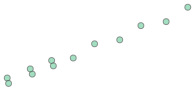

In [131]:
mp_moved = mov(*re.x,mp02)
mp_moved

In [132]:
df2_nums = list(zip(*df02['Num'].iteritems()))[1]
al = list(zip(df2_nums,mp_moved))
mov_stag = [[i[0],i[1].x,i[1].y,al[-1][1].distance(i[1])] for i in al]
mov_df = pd.DataFrame.from_records(mov_stag,columns=('Num','X','Y','Dist'))
mov_df

,Num,X,Y,Dist
0,609,-14508.085613,-446.117557,75.313632
1,608,-14486.660032,-431.841115,49.955337
2,610,-14529.792545,-448.635295,96.241950
3,611,-14549.225133,-462.265510,119.435671
4,612,-14574.382649,-466.186257,144.161730
5,610a,-14528.056404,-454.027120,96.753435
6,611a,-14551.228058,-457.041346,119.266772
7,612a,-14573.031527,-471.629786,144.996283
8,607,-14461.388582,-427.842827,25.570046
9,605,-14414.776804,-409.600672,25.691876


In [133]:
zz =  pd.concat([df01,mov_df.rename(columns={'Num':'Num'})]).fillna(0).groupby('Num', as_index=False).last()
zz

,Num,X,Y,Dist
0,593,-14133.887400,-299.583600,0.000000
1,594,-14159.244600,-303.605200,0.000000
2,595,-14180.551200,-317.862700,0.000000
3,596,-14205.796800,-321.824000,0.000000
4,597,-14227.175700,-336.142800,0.000000
5,597a,-14229.019800,-330.917400,0.000000
6,598,-14252.268910,-340.045658,51.162629
7,599,-14274.391879,-354.624764,25.844611
8,600,-14299.915662,-358.684370,0.000000
9,601,-14321.163836,-372.931709,25.582642


In [134]:
df01 = zz
df02 = pd.read_csv(r'data/chain/106.csv',sep=';', names=['Num','X','Y','Dist'],dtype={'Num':'str'})
inter = sorted(set(list(zip(*df01['Num'].iteritems()))[1]).intersection(set(list(zip(*df02['Num'].iteritems()))[1])))

df01_com = df01.loc[df01['Num'].isin(inter)].sort_values(by='Num')
df02_com = df02.loc[df02['Num'].isin(inter)].sort_values(by='Num')
mp01 = MultiPoint([i[2:4] for i in df01.itertuples()])
mp01_c = MultiPoint([i[2:4] for i in df01_com.itertuples()])
mp02 = MultiPoint([i[2:4] for i in df02.itertuples()])
mp02_c = MultiPoint([i[2:4] for i in df02_com.itertuples()])
x0 = (0,0,0)

re = minimize(fun1,x0,args=(mp01_c,mp02_c),method='SLSQP')
mp_moved = mov(*re.x,mp02)

In [137]:
re

     fun: 4.236177418337145
     jac: array([   1.99254447,   -0.40828776,  221.74558228,    0.        ])
 message: 'Iteration limit exceeded'
    nfev: 545
     nit: 101
    njev: 101
  status: 9
 success: False
       x: array([ -405.84391151,  3067.52073644,    12.65462041])

In [138]:
inter

['610', '610a', '611', '611a', '612', '612a']

In [136]:
df2_nums = list(zip(*df02['Num'].iteritems()))[1]
al = list(zip(df2_nums,mp_moved))
mov_stag = [[i[0],i[1].x,i[1].y,al[-1][1].distance(i[1])] for i in al]
mov_df = pd.DataFrame.from_records(mov_stag,columns=('Num','X','Y','Dist'))
mov_df

,Num,X,Y,Dist
0,612,-14574.506644,-465.178297,24.894722
1,611,-14549.211001,-462.285522,5.594790
2,613,-14596.914747,-478.751945,50.814175
3,614,-14620.621286,-481.361715,73.766592
4,615,-14643.239990,-494.780231,99.684099
5,613a,-14599.453386,-473.751012,51.273215
6,614a,-14619.703802,-486.664942,74.841707
7,615a,-14639.901496,-488.013992,94.161997
8,612a,-14573.378611,-470.672027,26.233544
9,610a,-14527.723964,-454.916681,23.366804


g